<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Edge-Attributes" data-toc-modified-id="Edge-Attributes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Edge Attributes</a></span></li><li><span><a href="#Node-attributes" data-toc-modified-id="Node-attributes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Node attributes</a></span></li><li><span><a href="#Analyzing-oscillation" data-toc-modified-id="Analyzing-oscillation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing oscillation</a></span></li></ul></div>

# Description

The new version of the algorithm (i.e. the iterative version) shows unexpected behavior. I thought the oscillations were partly due to the changing r_i. They are also linked of course to the evolving boundaries. 

It is also surprising to see such a high value of the duality gap. 

We want to investigate all those elements here. 

What can help is:
- rebalancer smoothing
- OD smoothing

# Load

In [83]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri

from result_analysis import print_final_flows

from result_analysis import plot_cost_all_path

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
path='Data/2Nodes/outputs/test_dualityGap/'

In [85]:
filename=os.listdir(path)[1]
with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res = pickle.load(f)

In [86]:
G_ref=G_FW[2]

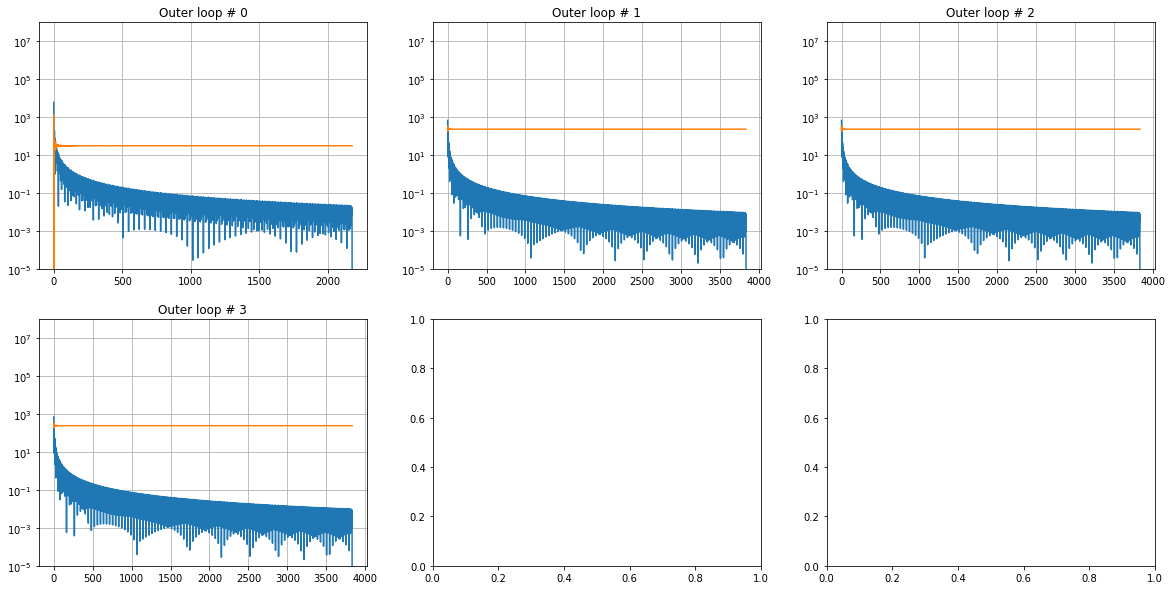

In [87]:
nplots=len(opt_res)
ncols=3
nrows=int(np.ceil(nplots/ncols))
_, axes = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))
for n in range(nplots):
    i = int(np.floor(n / ncols))
    j=n % ncols
    axes[i,j].plot(opt_res[n]['dual_gap'])
    axes[i,j].set_title('Outer loop # '+ str(n))
    axes[i,j].set_yscale('log')
#     axes[i,j].set_xscale('log')
    axes[i,j].grid(True)
    axes[i,j].plot(opt_res[n]['obj'])
    axes[i,j].set_ylim([10**-5,10**8])

# Edge Attributes

In [25]:
from result_analysis import plot_edge_attrs

In [26]:
OD

{('1', '1_p'): 10, ('2', '2_p'): 10}

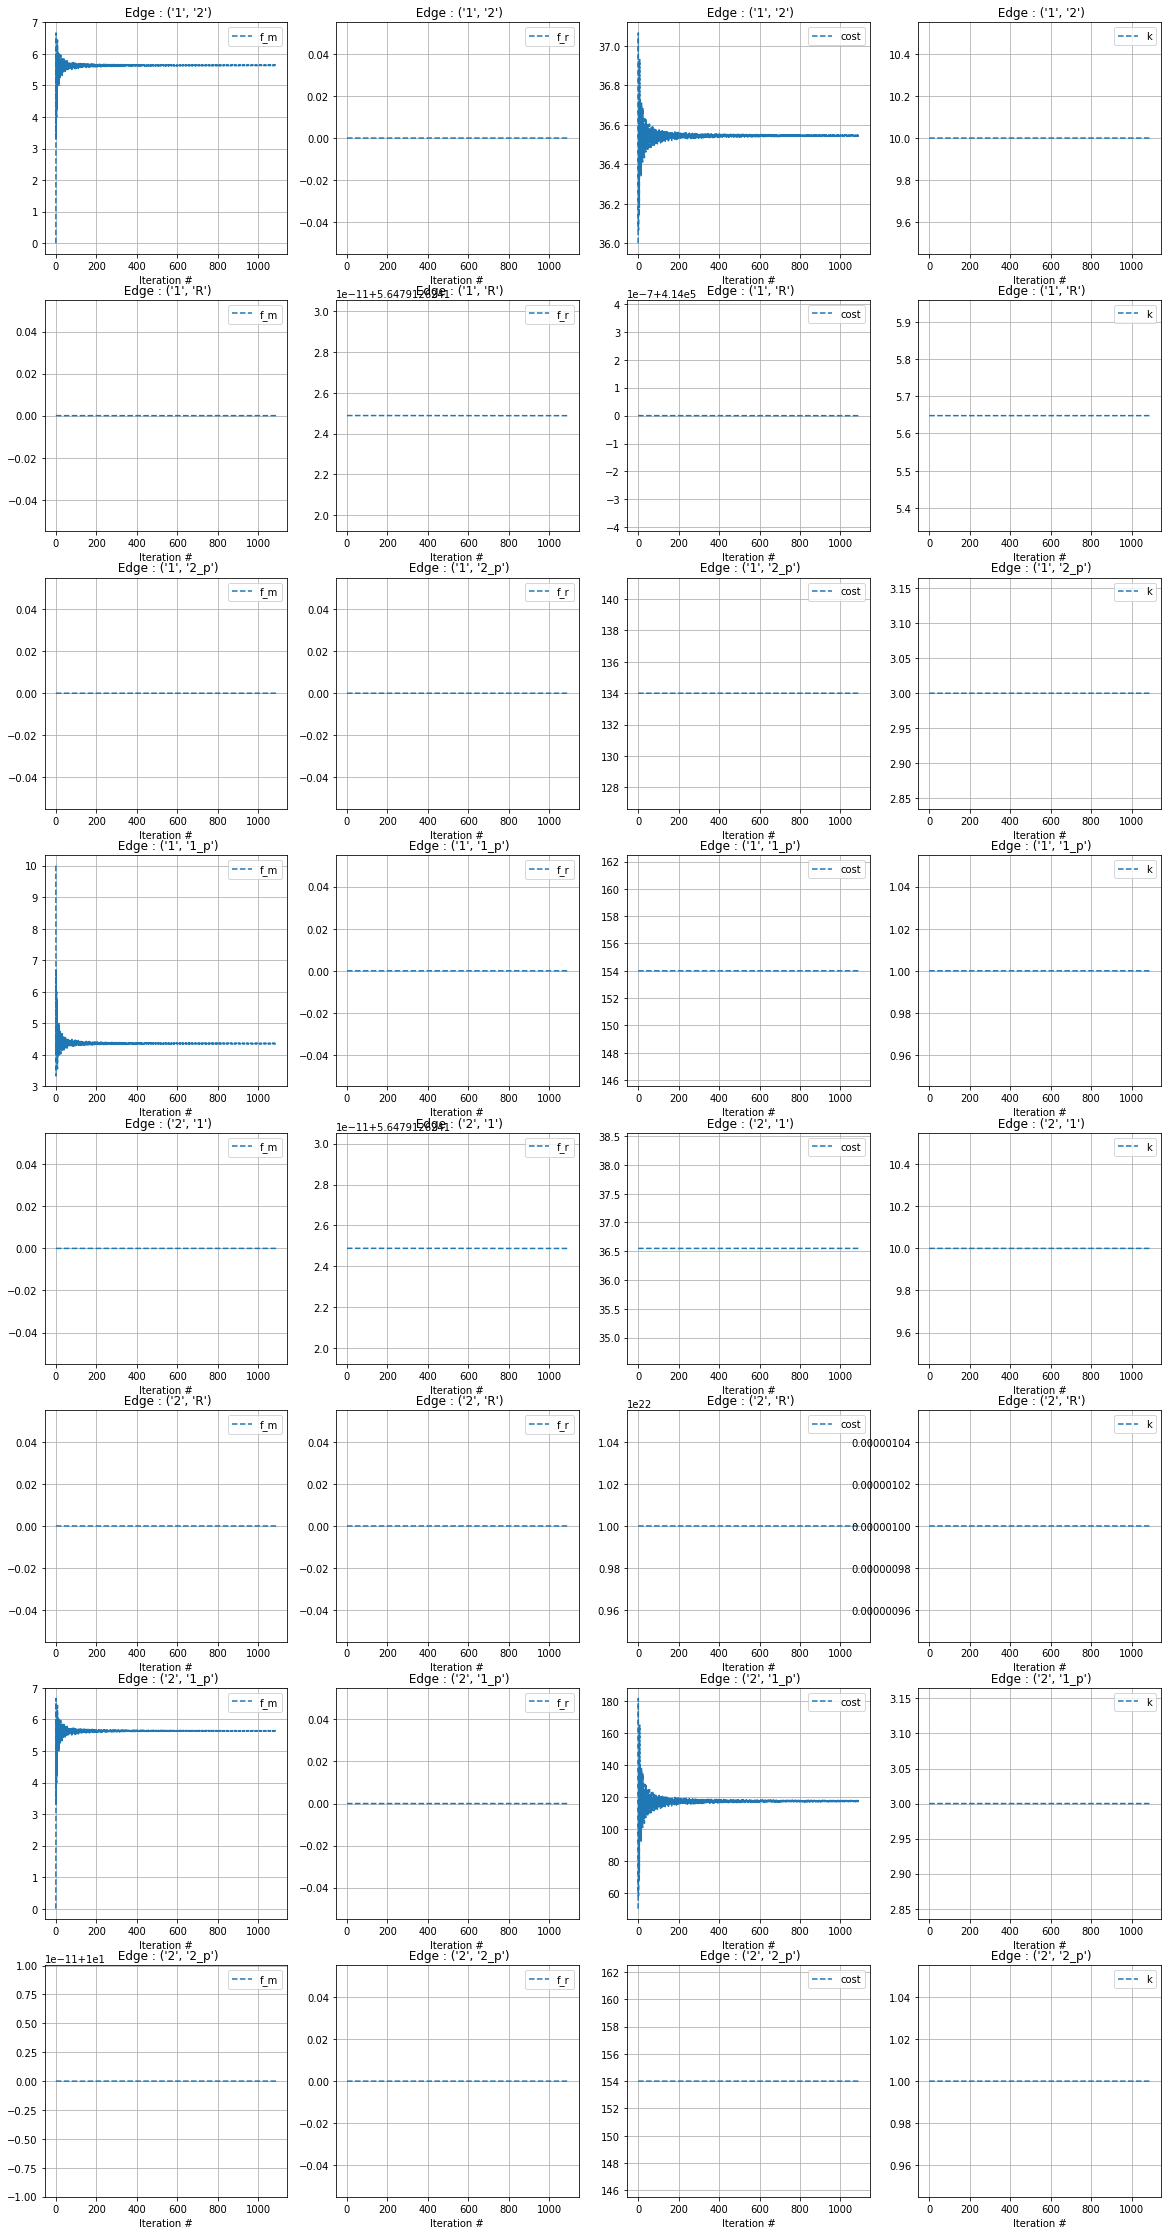

In [52]:
attrs=['f_m', 'f_r','cost','k']
# attrs=['f_m','f_r']
plot_edge_attrs(G_ref,None,attrs,dots=False,lims=None)

# Node attributes

In [50]:
G_ref[0].nodes['1']['ri']

5.647912624124882

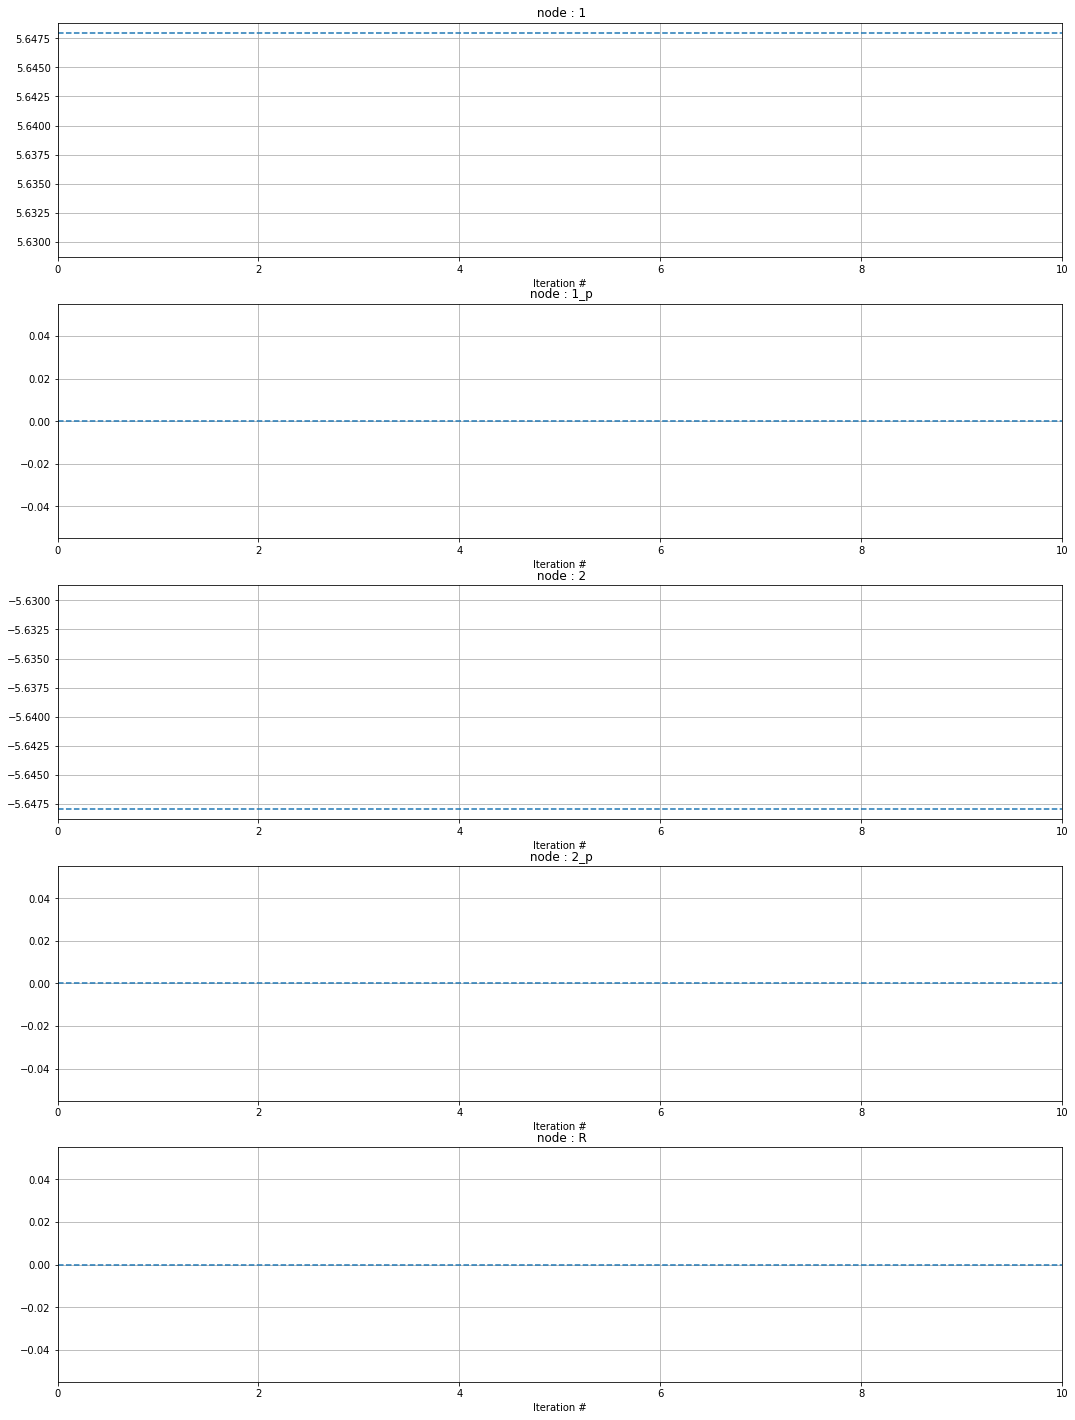

In [51]:
from result_analysis import plot_node_attrs
plot_node_attrs(G_ref,['ri'],lims=[0,10])

# Analyzing oscillation

In [77]:
from result_analysis import analyze_cost_oscillations_2

In [80]:
lims=[100,150]

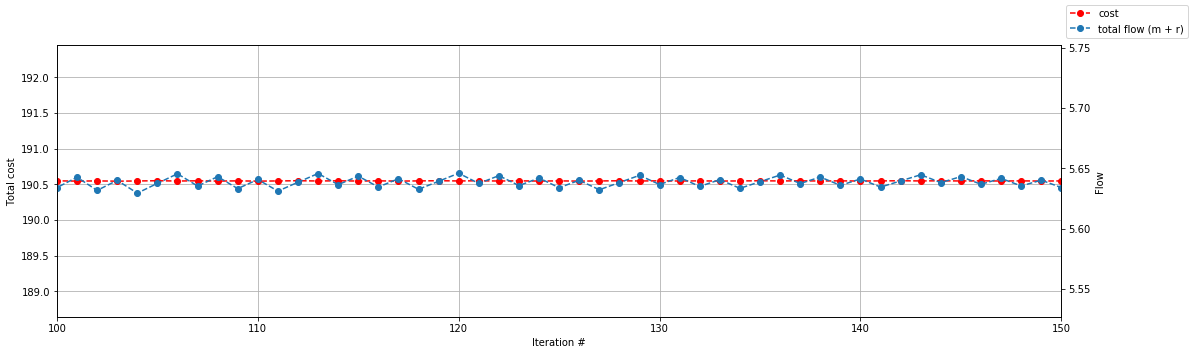

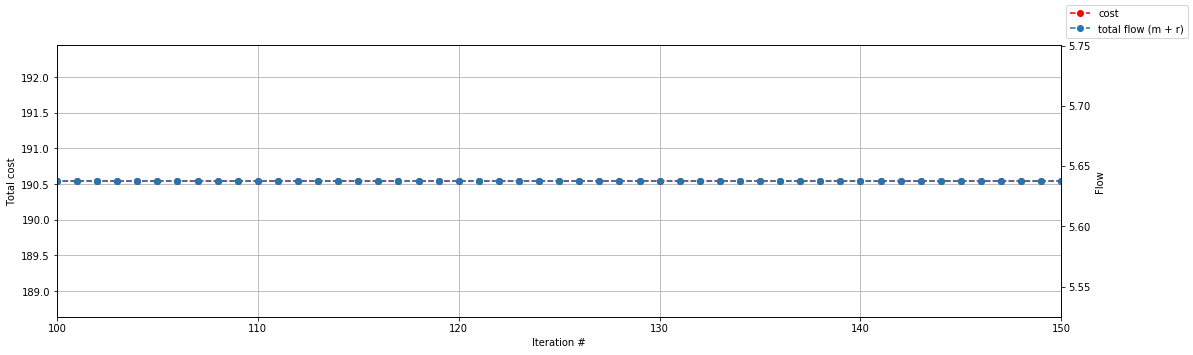

In [82]:
analyze_cost_oscillations_2(G_ref,'1','2',lims)
analyze_cost_oscillations_2(G_ref,'2','1',lims)